Zomato Data Analysis Project

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataframe= pd.read_csv("C:/Users/USER/Downloads/Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Convert the data type of column-rate

In [11]:
def handleRate(value):
    try:
        # Convert to string and split
        parts = str(value).split('/')
        # Ensure there's at least one part to avoid IndexError
        if parts and parts[0].strip():  
            return float(parts[0])  # Convert the first part to float
    except (ValueError, TypeError):  # Handle non-convertible values
        pass
    return None  # Return None for invalid or missing data

# Apply the function to the 'rate' column
dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


what type of restaurant di the majority of customer order from

Text(0.5, 0, 'Type of reastaurant')

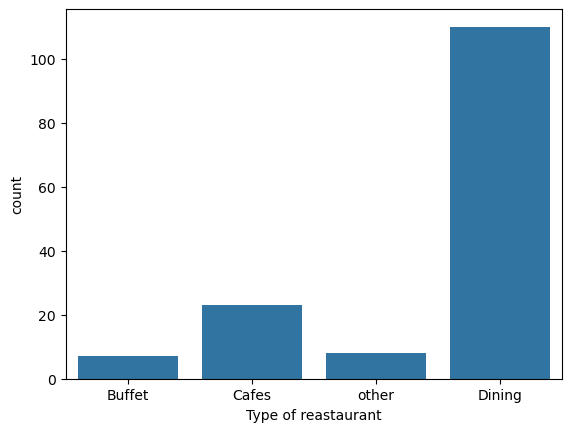

In [13]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Type of reastaurant')

conclusion- The customer that has the majority of order is form dining

How many Votes has each type of restaurant received from customers

Text(0, 0.5, 'Votes')

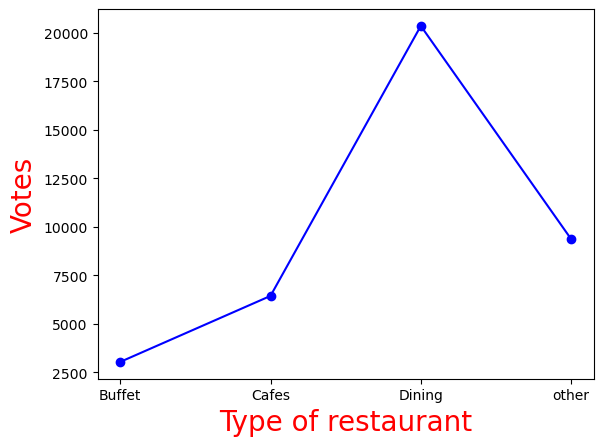

In [15]:
grouped = dataframe.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame(grouped)
plt.plot(result,c='blue',marker='o')
plt.xlabel('Type of restaurant',color='red',size=20)
plt.ylabel('Votes',color='red',size=20)

conclusion -Dining has got the most votes

what are the ratings that the majority of restaurant has reccieved

In [16]:
# Find the mode(s) of the 'rate' column
most_common_rating = dataframe['rate'].mode()

# Display the most common rating(s)
print("The most common rating(s) is/are:", most_common_rating.tolist())

# Analyze the frequency of ratings
rating_counts = dataframe['rate'].value_counts()
print("\nFrequency of Ratings:")
print(rating_counts)

The most common rating(s) is/are: [3.8]

Frequency of Ratings:
rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64


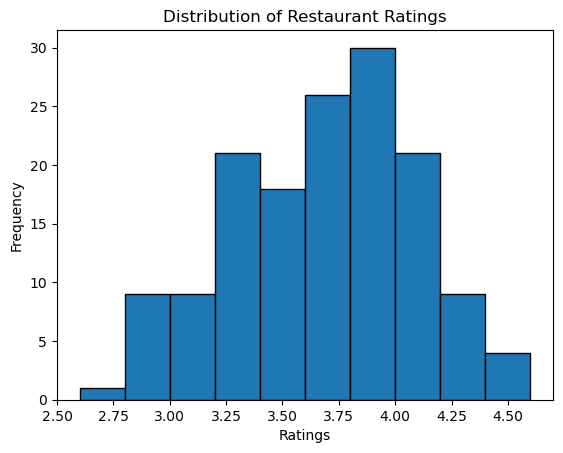

In [18]:
# Plot a histogram of ratings
dataframe['rate'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

CONCLUSION-THE most common rating is 3.8

What is the average spending of couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

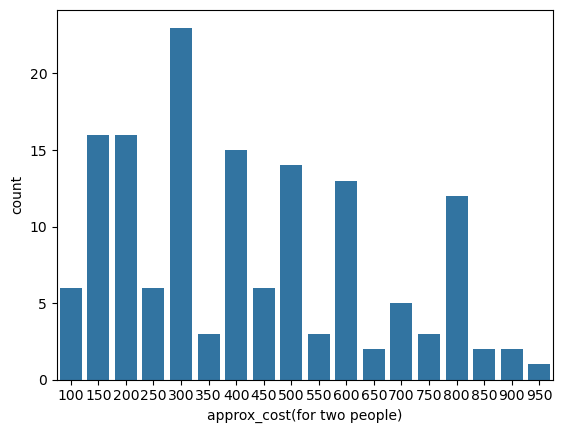

In [22]:
couple_Data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_Data)

Conclusion average spending is 300